## Demonstration 

### Step 1 — Import Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score



---

### Step 2 — Create and Preprocess Data

We’ll generate a simple non-linear dataset (`make_moons`) to visualize how FNN learns.


In [2]:
# Generate data
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize inputs
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




---

### Step 3 — Define the Feedforward Neural Network

#### Base Model (before tuning)


In [3]:
def create_model(learning_rate=0.001, dropout_rate=0.2, hidden_units=32):
    model = Sequential([
        Dense(hidden_units, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(dropout_rate),
        Dense(hidden_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')  # Binary output
    ])
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model



### Step 4 — Training Strategy

1. **Forward Pass:** Feed data through layers.
2. **Loss Computation:** Binary cross-entropy.
3. **Backpropagation:** Gradients calculated w.r.t. weights.
4. **Optimization:** Adam optimizer updates weights.
5. **Regularization:** Dropout to avoid overfitting.
6. **Validation:** Monitor performance per epoch.

---

#### Train the Model


In [4]:


model = create_model()
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)


C:\Users\sangouda\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6503 - loss: 0.6234 - val_accuracy: 0.8438 - val_loss: 0.5409
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8203 - loss: 0.5141 - val_accuracy: 0.8500 - val_loss: 0.4465
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8586 - loss: 0.4301 - val_accuracy: 0.8562 - val_loss: 0.3785
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8599 - loss: 0.3730 - val_accuracy: 0.8562 - val_loss: 0.3326
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8749 - loss: 0.3194 - val_accuracy: 0.8625 - val_loss: 0.3013
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8515 - loss: 0.3340 - val_accuracy: 0.8687 - val_loss: 0.2878
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8609 - loss: 0.2968 - val_accuracy: 0.8687 - val_loss: 0.2808
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8603 - loss: 0.3068 - val_accuracy: 0.8687 - 



---

### Step 5 — Evaluate Performance


In [5]:

y_pred = (model.predict(X_test) > 0.5).astype("int32")
test_acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_acc:.4f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Test Accuracy: 0.9750




---

### Step 6 — Hyperparameter Tuning Strategies

We can test different configurations manually or use tools.

#### Example: Manual Search Loop



In [6]:

param_grid = {
    'learning_rate': [0.01, 0.001],
    'dropout_rate': [0.1, 0.3, 0.5],
    'hidden_units': [16, 32, 64]
}

best_acc = 0
best_params = {}

for lr in param_grid['learning_rate']:
    for dr in param_grid['dropout_rate']:
        for hu in param_grid['hidden_units']:
            print(f"Testing: lr={lr}, dropout={dr}, units={hu}")
            model = create_model(learning_rate=lr, dropout_rate=dr, hidden_units=hu)
            model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
            y_pred = (model.predict(X_test) > 0.5).astype("int32")
            acc = accuracy_score(y_test, y_pred)
            if acc > best_acc:
                best_acc = acc
                best_params = {'lr': lr, 'dropout': dr, 'units': hu}

print("Best Parameters:", best_params)
print("Best Accuracy:", best_acc)


Testing: lr=0.01, dropout=0.1, units=16


C:\Users\sangouda\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Testing: lr=0.01, dropout=0.1, units=32


C:\Users\sangouda\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Testing: lr=0.01, dropout=0.1, units=64


C:\Users\sangouda\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Testing: lr=0.01, dropout=0.3, units=16


C:\Users\sangouda\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Testing: lr=0.01, dropout=0.3, units=32


C:\Users\sangouda\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Testing: lr=0.01, dropout=0.3, units=64


C:\Users\sangouda\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Testing: lr=0.01, dropout=0.5, units=16


C:\Users\sangouda\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Testing: lr=0.01, dropout=0.5, units=32


C:\Users\sangouda\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step
Testing: lr=0.01, dropout=0.5, units=64


C:\Users\sangouda\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Testing: lr=0.001, dropout=0.1, units=16


C:\Users\sangouda\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Testing: lr=0.001, dropout=0.1, units=32


C:\Users\sangouda\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Testing: lr=0.001, dropout=0.1, units=64


C:\Users\sangouda\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Testing: lr=0.001, dropout=0.3, units=16


C:\Users\sangouda\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Testing: lr=0.001, dropout=0.3, units=32


C:\Users\sangouda\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Testing: lr=0.001, dropout=0.3, units=64


C:\Users\sangouda\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Testing: lr=0.001, dropout=0.5, units=16


C:\Users\sangouda\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Testing: lr=0.001, dropout=0.5, units=32


C:\Users\sangouda\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Testing: lr=0.001, dropout=0.5, units=64


C:\Users\sangouda\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Best Parameters: {'lr': 0.01, 'dropout': 0.1, 'units': 32}
Best Accuracy: 0.985




---

#### Visualization (Optional)


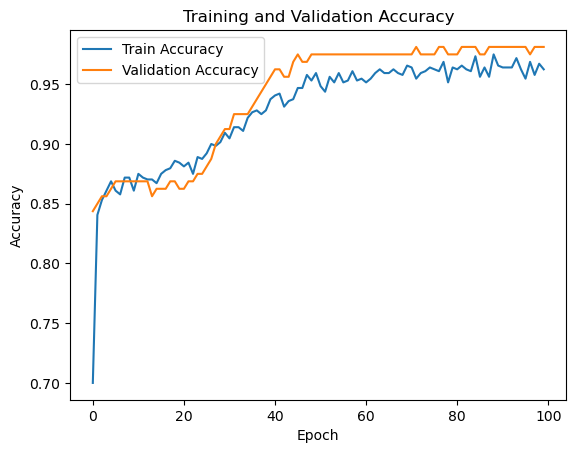

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()




---

**Summary of the Workflow**

| Step | Component             | Purpose                                |
| ---- | --------------------- | -------------------------------------- |
| 1    | Data Preparation      | Normalize & split data                 |
| 2    | Model Design          | Layers, activations, dropout           |
| 3    | Training              | Forward + backward propagation         |
| 4    | Evaluation            | Check accuracy, loss                   |
| 5    | Hyperparameter Tuning | Optimize learning rate, units, dropout |
| 6    | Validation            | Prevent overfitting                    |
| 7    | Testing               | Final accuracy check                   |

---

**Key Hyperparameters Tuned**

| Hyperparameter | Description                       | Typical Range |
| -------------- | --------------------------------- | ------------- |
| Learning rate  | Step size for weight updates      | 0.0001–0.01   |
| Dropout rate   | Fraction of neurons dropped       | 0.1–0.5       |
| Hidden units   | Number of neurons per layer       | 16–512        |
| Batch size     | Samples per gradient update       | 16–128        |
| Epochs         | Full passes through training data | 50–200        |

---

**Takeaways**

* **Feedforward networks** learn by minimizing loss through **backpropagation**.
* **Regularization (Dropout, L2)** helps avoid overfitting.
* **Hyperparameter tuning** is crucial for performance.
* **Adam optimizer** with proper learning rate scheduling provides fast convergence.
* **Validation loss** monitoring ensures generalization.

